# GP4QC

## Install Dependencies

In [1]:
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load and Preprocess Data

In [2]:
import pandas as pd 

# To avoid consistency errors, copy the results from each server to 
# separate directories. The files from these directories are merged here.

icarus_experiments = pd.read_csv("results/icarus/experiments.csv", delimiter=";")
romulus_experiments = pd.read_csv("results/romulus/experiments.csv", delimiter=";")
all_experiments = pd.concat([icarus_experiments, romulus_experiments], ignore_index=True)

icarus_events = pd.read_csv("results/icarus/events.csv", delimiter=";")
romulus_events = pd.read_csv("results/romulus/events.csv", delimiter=";")
all_events = pd.concat([icarus_events, romulus_events], ignore_index=True)

icarus_fitness_values = pd.read_csv("results/icarus/fitness_values.csv", delimiter=";")
romulus_fitness_values = pd.read_csv("results/romulus/fitness_values.csv", delimiter=";")
all_fitness_values = pd.concat([icarus_fitness_values, romulus_fitness_values], ignore_index=True)

/var/folders/8q/rp8w2yvx1wq18fndqwtvqx340000gn/T/ipykernel_99127/1677399368.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Remove potential trailing white spaces from column names
all_experiments.columns = all_experiments.columns.str.strip()
all_events.columns = all_events.columns.str.strip()
all_fitness_values.columns = all_fitness_values.columns.str.strip()

In [4]:
from datetime import datetime

all_experiments["created_at"] = all_experiments["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
all_events["created_at"] = all_events["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
all_fitness_values["created_at"] = all_fitness_values["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))

In [5]:
def extract_fitness(fitness: str) -> str:
    fitness = fitness.split()[0]
    fitness = fitness.split(".")[-1]
    return fitness

all_experiments["fitness"] = all_experiments["fitness"].apply(lambda x: extract_fitness(x))

In [6]:
def create_configuration(fitness: str, description: str) -> str:
    if description.strip() == "":
        return f"{fitness}; no abstraction learning"
    else:
        return f"{fitness}; {description.strip()}"

all_experiments["configuration"] = all_experiments[["fitness", "description"]].apply(lambda row: create_configuration(row[0], row[1]), axis=1)

/var/folders/8q/rp8w2yvx1wq18fndqwtvqx340000gn/T/ipykernel_99127/2113213457.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_experiments["configuration"] = all_experiments[["fitness", "description"]].apply(lambda row: create_configuration(row[0], row[1]), axis=1)


In [7]:
all_experiments = all_experiments.sort_values(by=["created_at"], ascending=True)
all_events = all_events.sort_values(by=["created_at"], ascending=True)
all_fitness_values = all_fitness_values.sort_values(by=["created_at"], ascending=True)

## Select Test Case

In [8]:
EVALUATION_CASE = "grover" # bernstein

experiments = all_experiments.loc[all_experiments["experiment_id"].str.startswith(EVALUATION_CASE)]
fitness_values = all_fitness_values.loc[all_fitness_values["experiment_id"].str.startswith(EVALUATION_CASE)]
events = all_events

## Visualize Fitness Value Changes By Experiment

Experiment Id: grover_3qubits_2b9e930d-409c-4cf5-b1d1-06f9ea64468c
	Configuration: BaselineFitness; no abstraction learning
	2024-04-26 08:48:02.176056 - 2024-04-27 04:54:15.290400


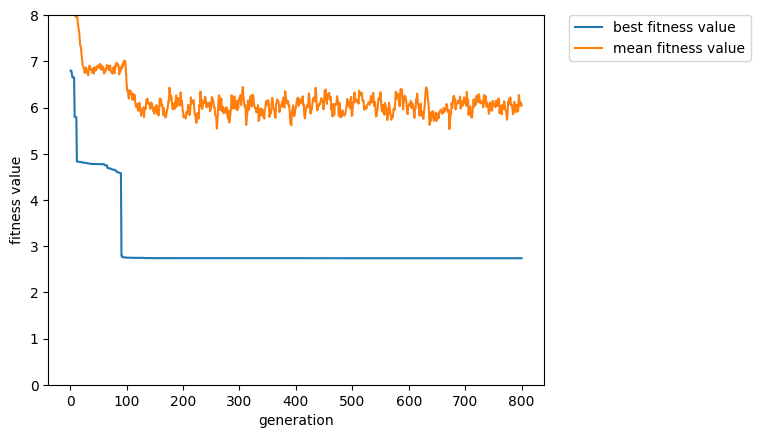

Experiment Id: grover_3qubits_3122e137-b9f3-45da-8987-d470e494c774
	Configuration: BaselineFitness; no abstraction learning
	2024-04-26 08:50:16.363809 - 2024-04-27 22:28:00.917024


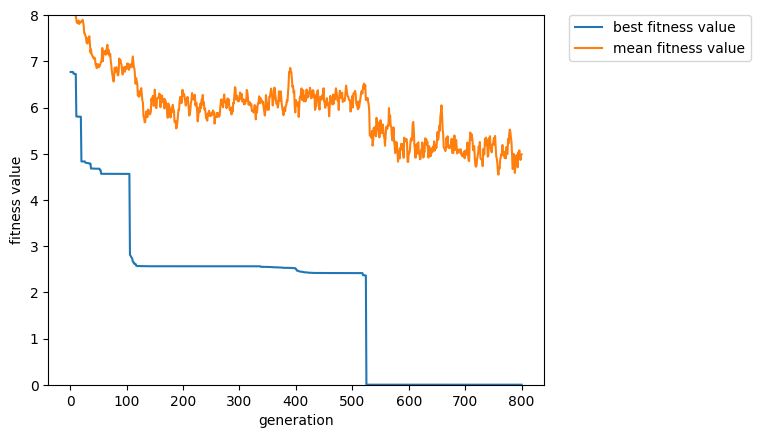

Experiment Id: grover_3qubits_71b8268a-9080-42fc-b339-ea0e97936f6a
	Configuration: IndirectQAFitness; no abstraction learning
	2024-04-27 20:39:12.857013 - 2024-04-28 18:03:40.433681


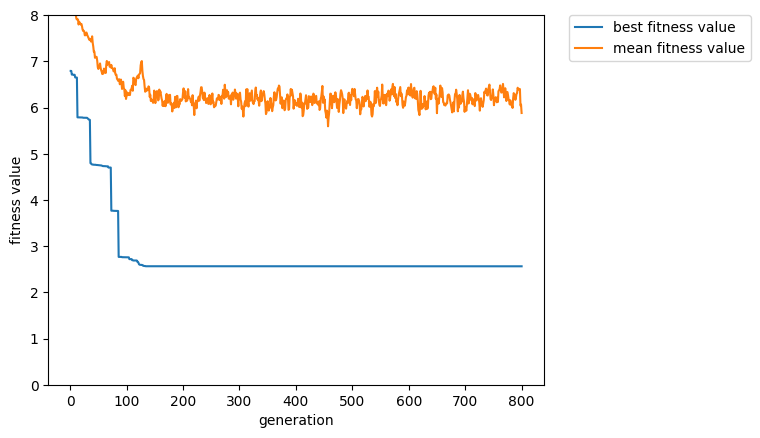

Experiment Id: grover_3qubits_48bc103e-a133-4ff8-b463-83eac2c10bb3
	Configuration: IndirectQAFitness; no abstraction learning
	2024-04-28 08:29:57.285299 - 2024-04-30 06:17:14.867973


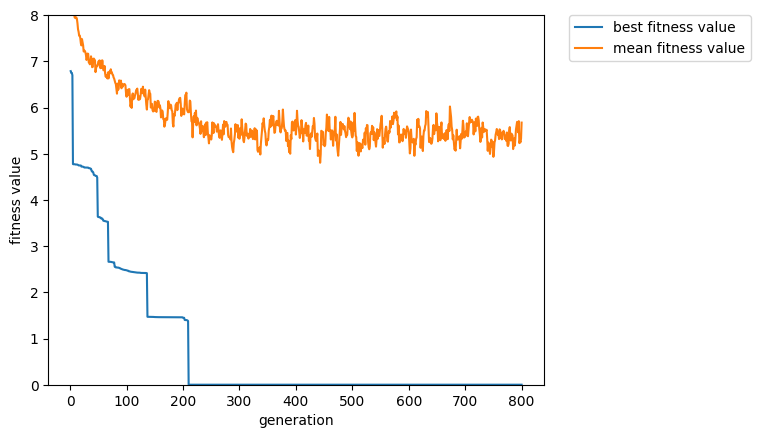

Experiment Id: grover_3qubits_3df568fa-7400-4020-8400-a83df2871f9e
	Configuration: DirectQAFitness; no abstraction learning
	2024-04-29 16:20:19.474454 - 2024-04-30 18:27:56.854221


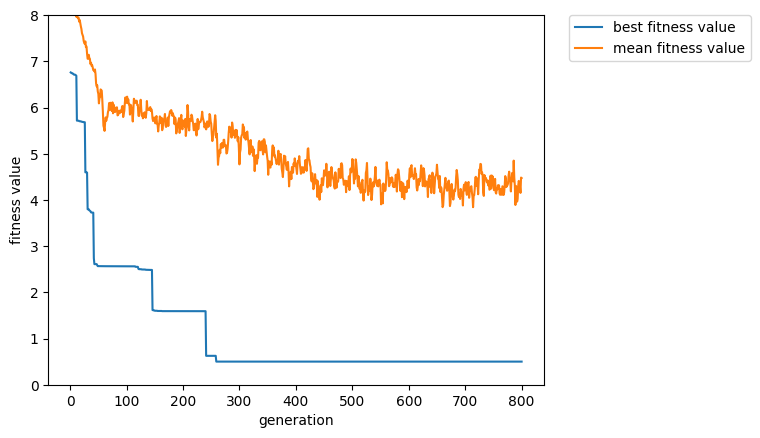

Experiment Id: grover_3qubits_22c921d5-c906-4c42-98d8-b26dc2b4fc16
	Configuration: DirectQAFitness; no abstraction learning
	2024-04-30 07:29:33.804387 - 2024-05-02 12:32:36.270730


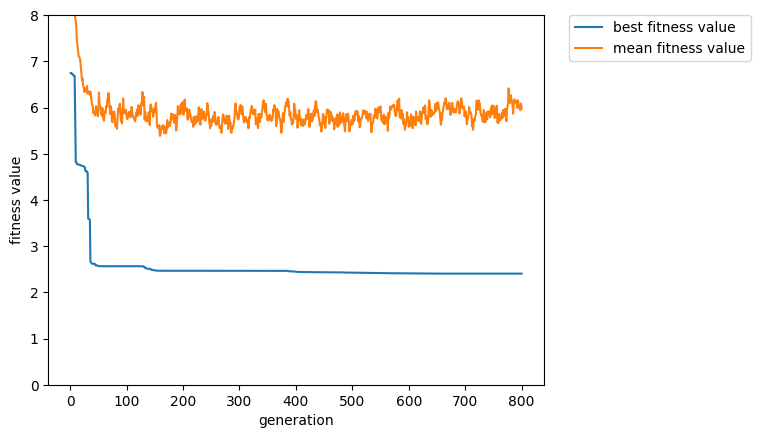

Experiment Id: grover_3qubits_f30dfc5a-46d5-4ef2-9c5c-8a00697312e7
	Configuration: BaselineFitness; abstraction learning enabled
	2024-05-01 16:46:38.873043 - 2024-05-02 15:29:02.681677


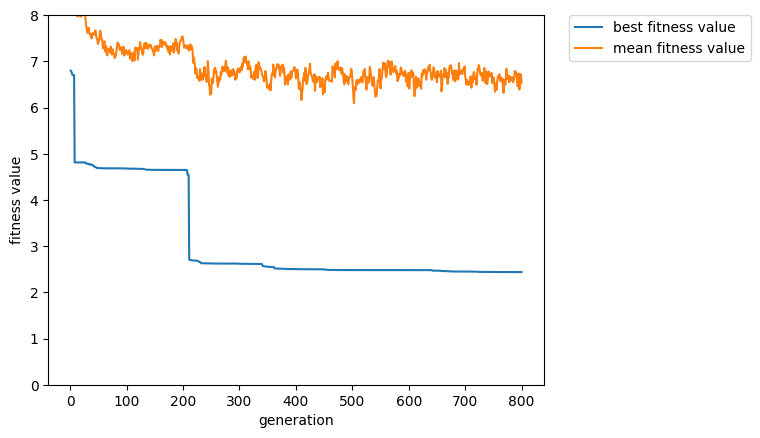

Experiment Id: grover_3qubits_f49be800-0f48-4200-b568-c9fbc2353188
	Configuration: IndirectQAFitness; abstraction learning enabled
	2024-05-02 15:58:51.353076 - 2024-05-02 22:24:10.822483


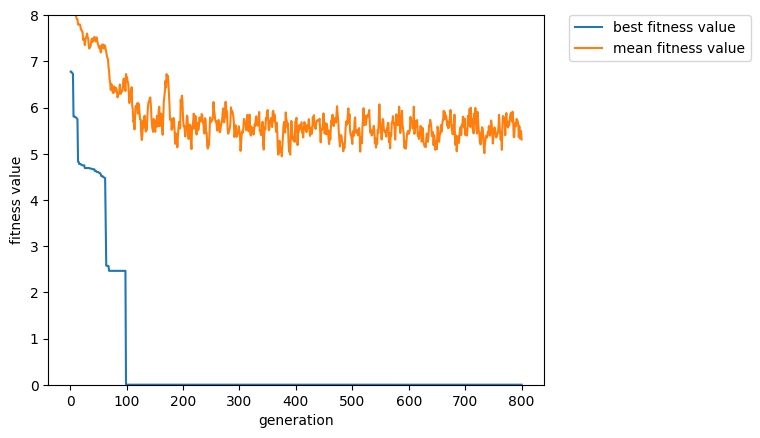

Experiment Id: grover_3qubits_09fc10f7-6ce7-41c2-bbb9-f11e6d85db4f
	Configuration: BaselineFitness; abstraction learning enabled
	2024-05-02 16:07:12.086082 - 2024-05-03 03:29:02.431762


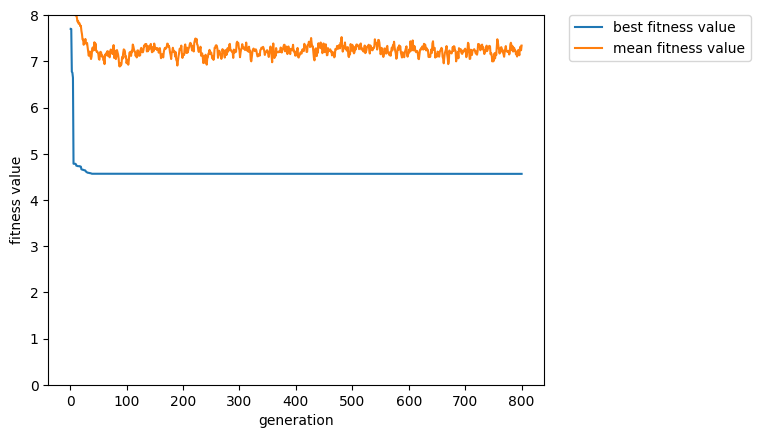

Experiment Id: grover_3qubits_57ddf7c4-7e9b-4417-b1fa-8e8c658748ec
	Configuration: DirectQAFitness; abstraction learning enabled
	2024-05-03 07:48:45.465318 - 2024-05-03 13:30:21.765843


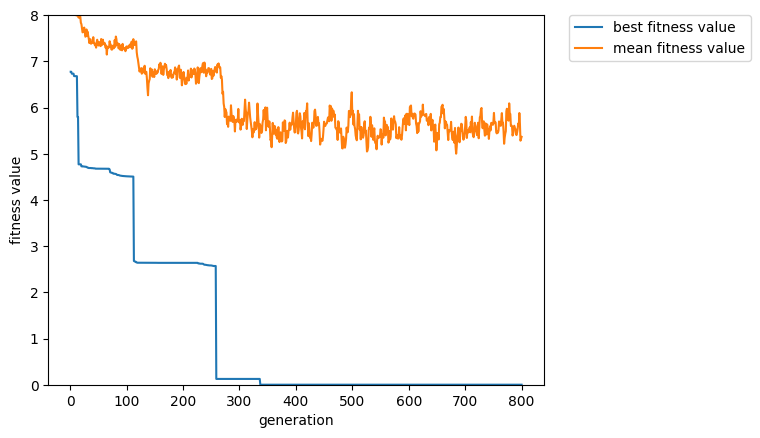

Experiment Id: grover_3qubits_041f3795-cee9-445c-af3a-2d636bbe2d90
	Configuration: IndirectQAFitness; abstraction learning enabled
	2024-05-03 07:51:01.375171 - 2024-05-03 16:20:55.167964


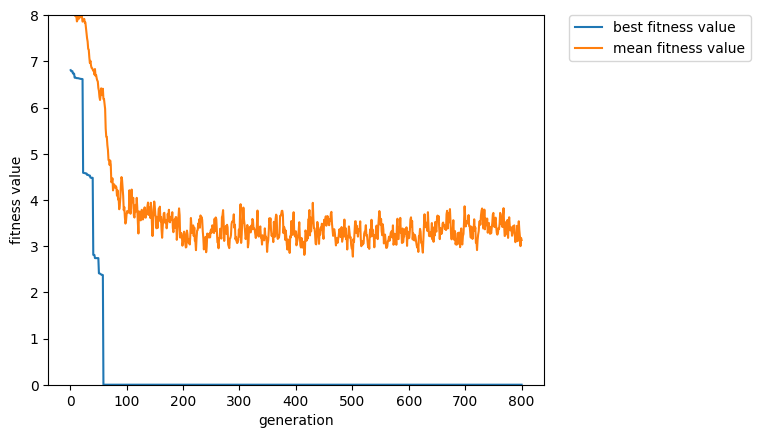

Experiment Id: grover_3qubits_b82ca9a9-ead5-40d0-86b6-ef302ac76aff
	Configuration: DirectQAFitness; abstraction learning enabled
	2024-05-03 16:21:42.629130 - 2024-05-04 10:34:27.168287


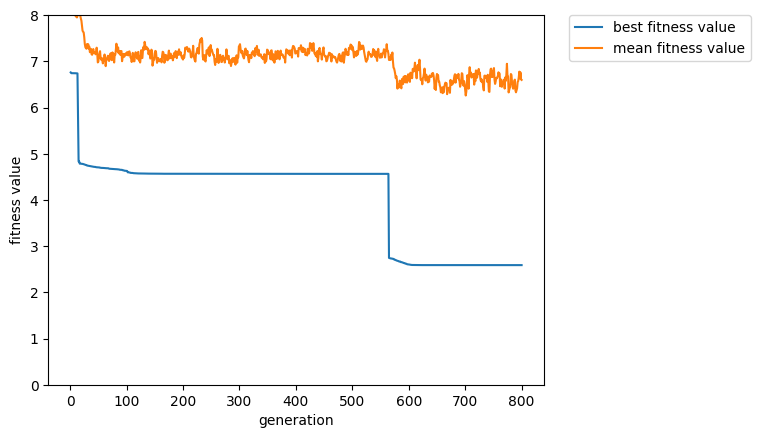

Experiment Id: grover_3qubits_f0dcf74c-80d8-4b92-a1bb-d939ae3c03b1
	Configuration: BaselineFitness; no abstraction learning
	2024-05-06 08:17:31.073625 - 2024-05-06 08:28:55.795858


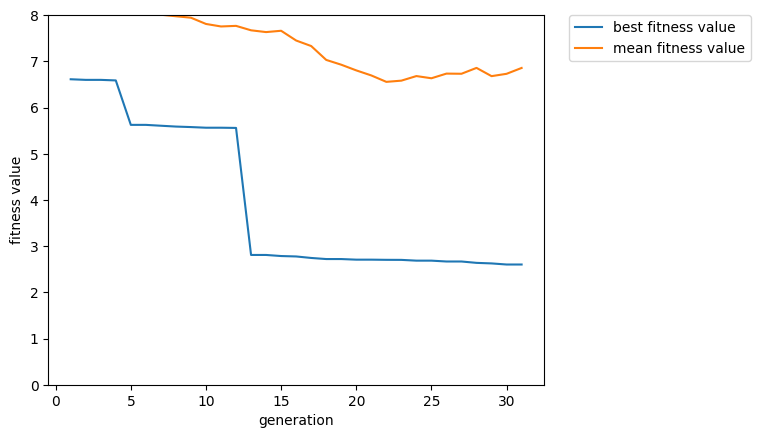

Experiment Id: grover_3qubits_d758b3bb-f072-4fcf-afbb-091dbbee9a09
	Configuration: BaselineFitness; no abstraction learning
	2024-05-06 08:38:41.779171 - 2024-05-06 14:15:54.929271


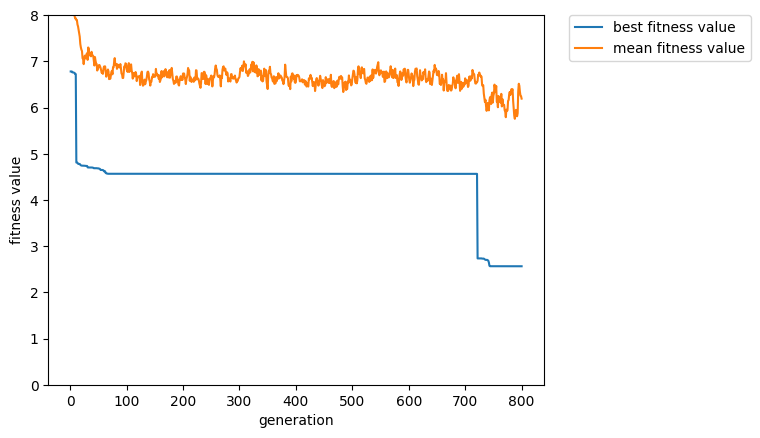

Experiment Id: grover_3qubits_998b53de-b854-441b-8399-811b3f5b6126
	Configuration: IndirectQAFitness; no abstraction learning
	2024-05-06 14:16:17.260638 - 2024-05-06 19:40:58.275831


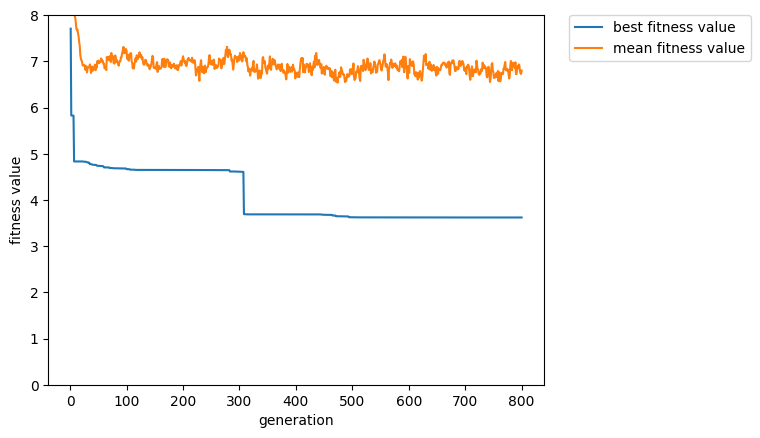

Experiment Id: grover_3qubits_0e8ce9bc-5a99-4a97-9bf8-468cfda3ba05
	Configuration: DirectQAFitness; no abstraction learning
	2024-05-06 19:41:21.375031 - 2024-05-07 01:54:50.568879


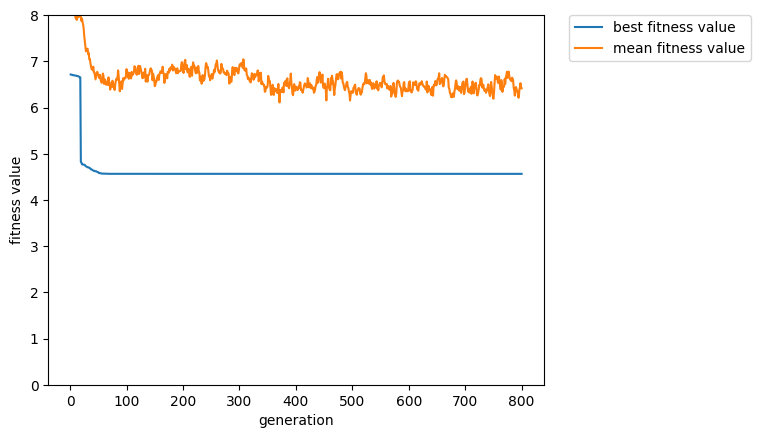

Experiment Id: grover_3qubits_da766979-9829-4a76-a236-498a54103ed0
	Configuration: BaselineFitness; abstraction learning enabled
	2024-05-07 01:55:14.137953 - 2024-05-07 13:43:33.800847


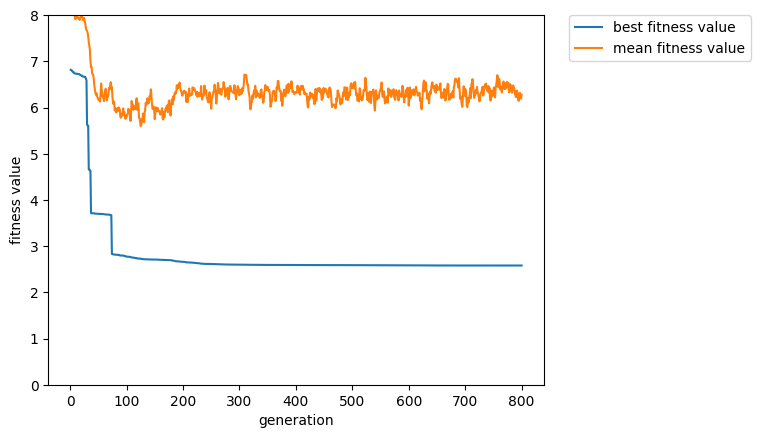

Experiment Id: grover_3qubits_942c2339-6bc6-4682-bcd6-211bc5da6567
	Configuration: BaselineFitness; no abstraction learning
	2024-05-07 12:09:37.679352 - 2024-05-07 23:15:06.687292


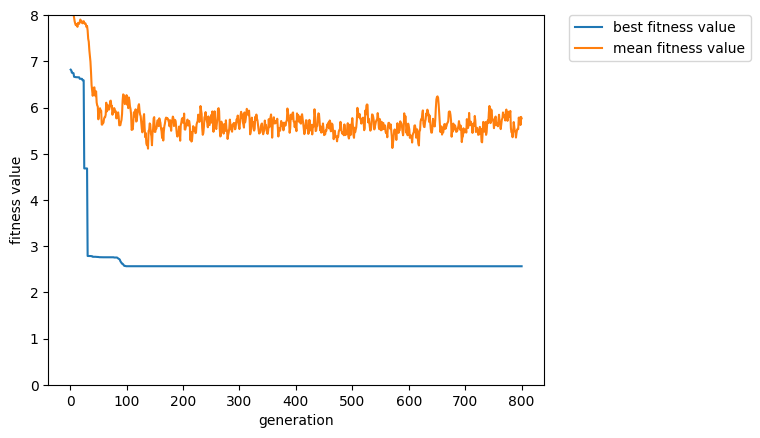

Experiment Id: grover_3qubits_950715b8-1c08-4a05-975d-3dceec4543e5
	Configuration: IndirectQAFitness; abstraction learning enabled
	2024-05-07 13:43:58.055970 - 2024-05-07 22:57:14.355868


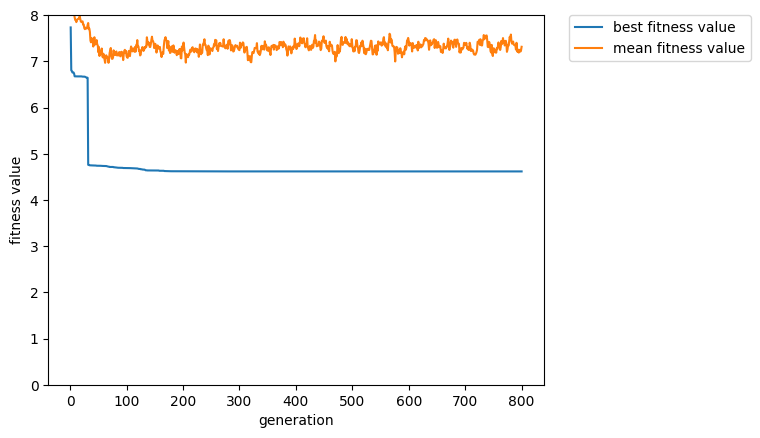

Experiment Id: grover_3qubits_a14e59f5-5b95-4a4f-9294-69da2015535e
	Configuration: DirectQAFitness; abstraction learning enabled
	2024-05-07 22:57:38.606383 - 2024-05-08 05:45:19.440853


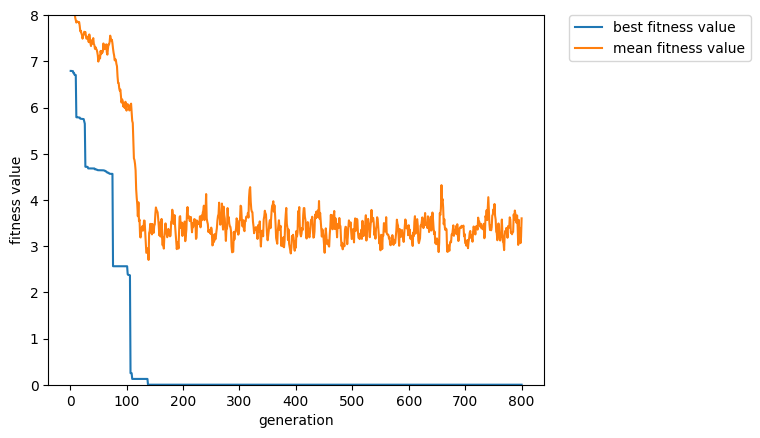

Experiment Id: grover_3qubits_26a717ff-8199-4125-8a9d-f9b144ef2a42
	Configuration: IndirectQAFitness; no abstraction learning
	2024-05-07 23:15:51.778553 - 2024-05-08 10:45:00.261906


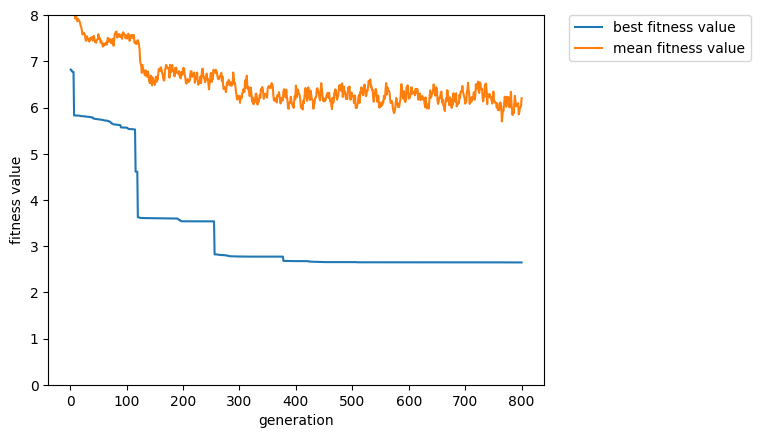

Experiment Id: grover_3qubits_28c9ccc5-cd66-47bc-b5c5-2b9cbb89e47a
	Configuration: DirectQAFitness; no abstraction learning
	2024-05-08 10:45:46.663417 - 2024-05-08 17:34:40.587172


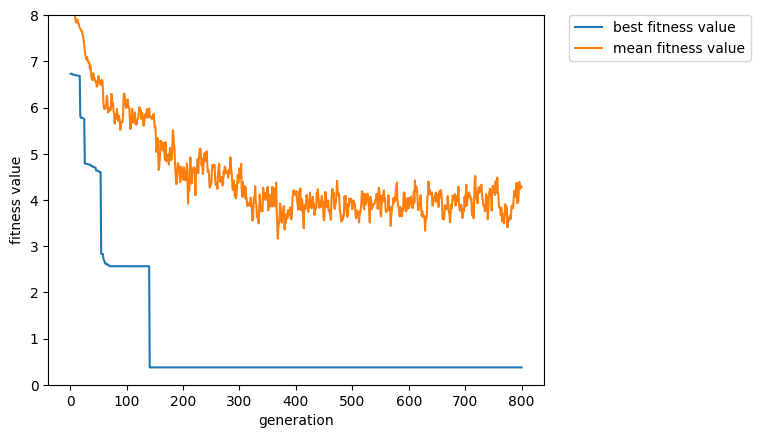

Experiment Id: grover_3qubits_e07ae653-0e34-440a-834f-0bdce67fdf22
	Configuration: BaselineFitness; abstraction learning enabled
	2024-05-08 17:35:25.786858 - 2024-05-09 06:55:49.538994


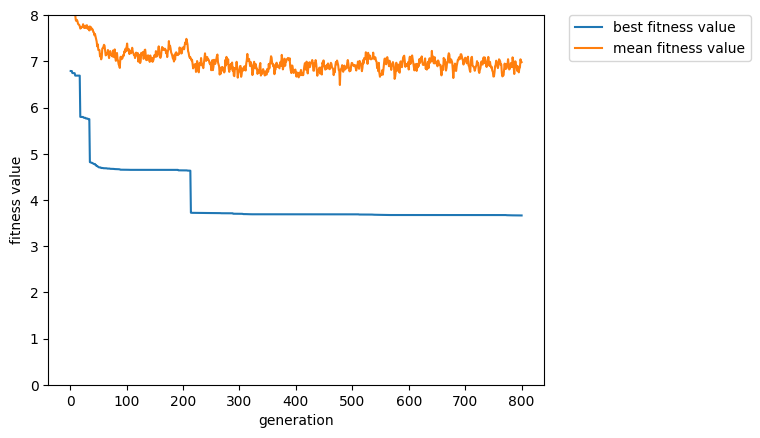

Experiment Id: grover_3qubits_62082352-db98-4a1f-96fa-2a07a0d09553
	Configuration: IndirectQAFitness; abstraction learning enabled
	2024-05-09 06:56:35.639041 - 2024-05-09 19:05:44.880265


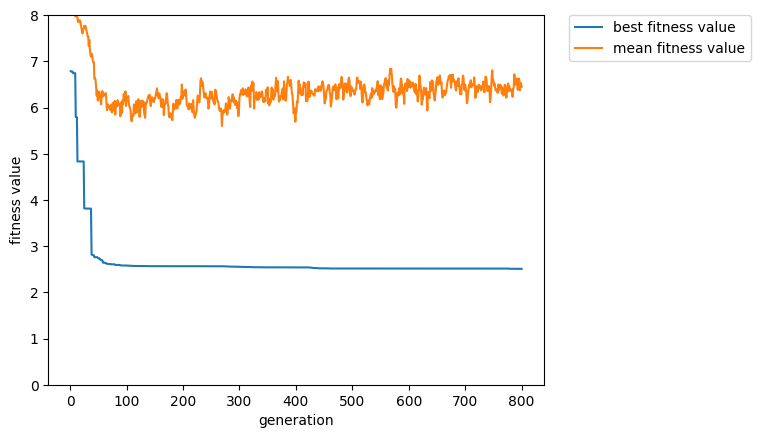

Experiment Id: grover_3qubits_cd80d8e4-506f-47a4-9d62-599a71966897
	Configuration: BaselineFitness; no abstraction learning
	2024-05-09 18:36:09.727786 - 2024-05-10 00:14:18.583608


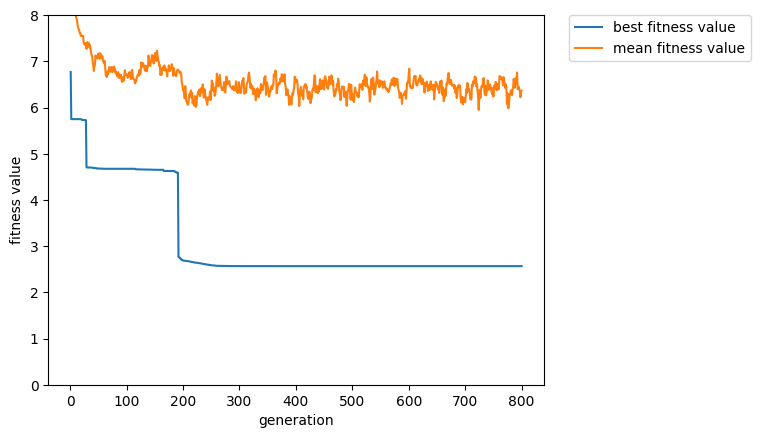

Experiment Id: grover_3qubits_3c6c7598-3c7a-48f6-8ba5-a02db0f65a23
	Configuration: DirectQAFitness; abstraction learning enabled
	2024-05-09 19:06:30.431019 - 2024-05-10 15:11:30.979307


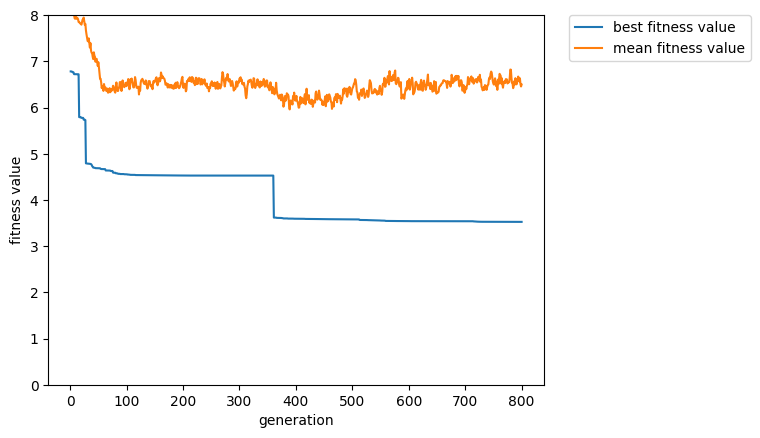

Experiment Id: grover_3qubits_401913f7-6874-44cc-aef8-ac27a0198465
	Configuration: IndirectQAFitness; no abstraction learning
	2024-05-10 00:14:41.333454 - 2024-05-10 05:58:24.476750


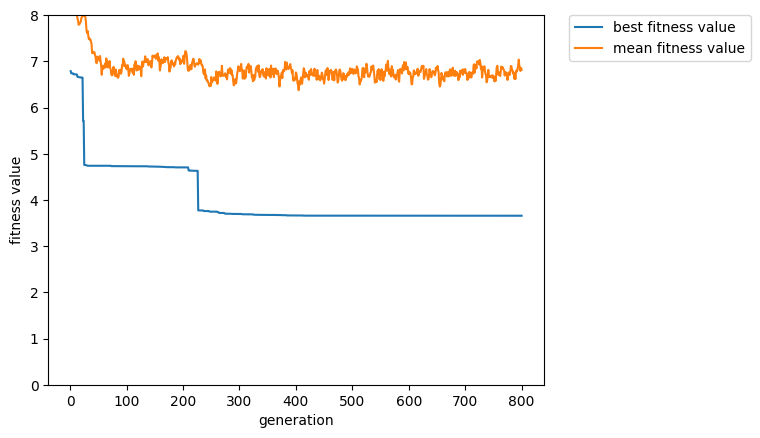

Experiment Id: grover_3qubits_ef438c7e-5b59-4218-845a-d46efb694dc2
	Configuration: DirectQAFitness; no abstraction learning
	2024-05-10 05:58:46.992859 - 2024-05-10 11:16:03.444995


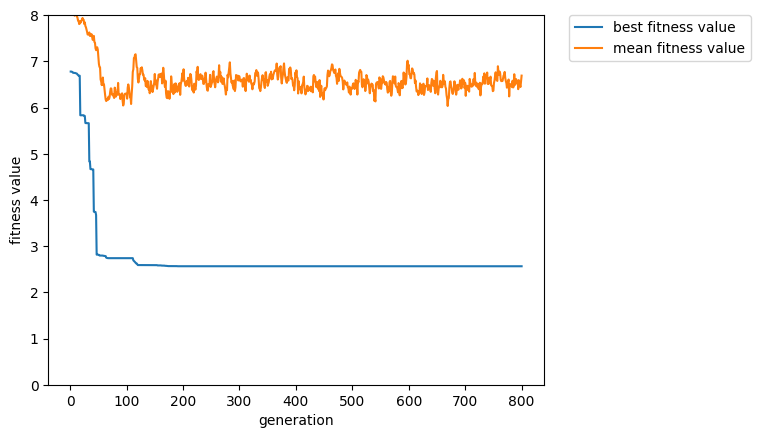

Experiment Id: grover_3qubits_d81bd6ae-5daa-40f7-baaa-c7d99def3676
	Configuration: BaselineFitness; abstraction learning enabled
	2024-05-10 11:16:27.225974 - 2024-05-10 16:35:28.944205


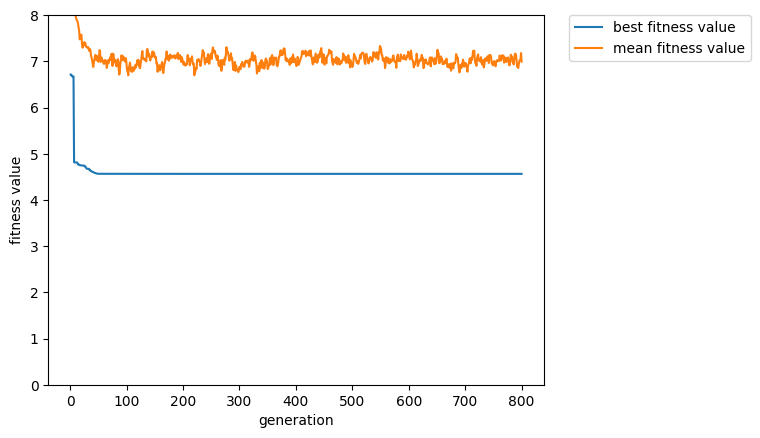

Experiment Id: grover_3qubits_421c4db2-3b29-46a4-8ed0-541231277c03
	Configuration: IndirectQAFitness; abstraction learning enabled
	2024-05-10 16:35:52.037603 - 2024-05-10 22:46:20.217057


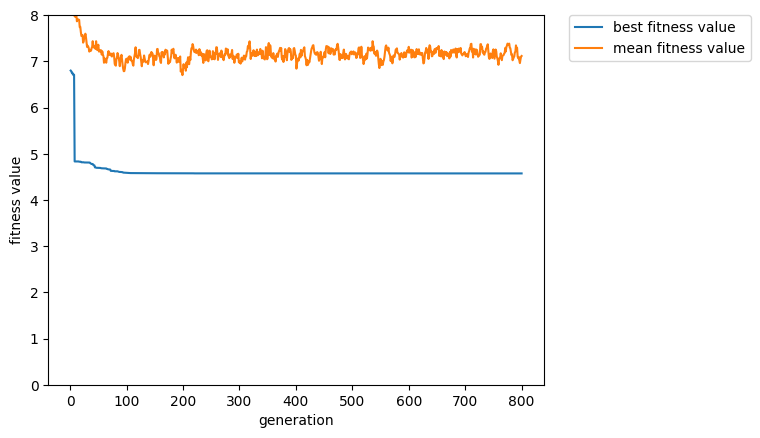

Experiment Id: grover_3qubits_f7ce8a5b-591b-42b1-aad6-c7cc1bbded3e
	Configuration: DirectQAFitness; abstraction learning enabled
	2024-05-10 22:46:44.096394 - 2024-05-11 06:50:46.424254


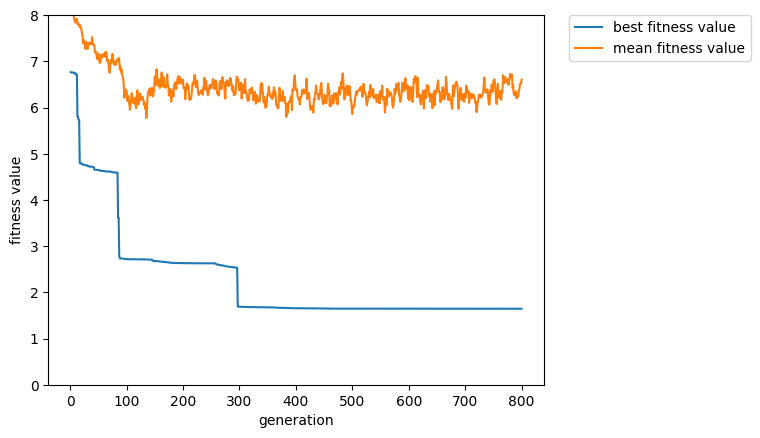

In [9]:
from matplotlib import pyplot as plt

experiment_ids = experiments["experiment_id"].unique()

for experiment_id in experiment_ids:
    configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
 
    ax = plt.subplot()
    ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])
    ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])
    ax.set_xlabel("generation")
    ax.set_ylabel("fitness value")
    ax.set_ylim([0, 8])
    
    print(f"Experiment Id: {experiment_id}")
    print(f"\tConfiguration: {configuration}")
    print(f"\t{current_fitness_values['created_at'].min()} - {current_fitness_values['created_at'].max()}")
    
    plt.legend(["best fitness value", "mean fitness value"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Visualize Fitness Value Changes Accross Experiments

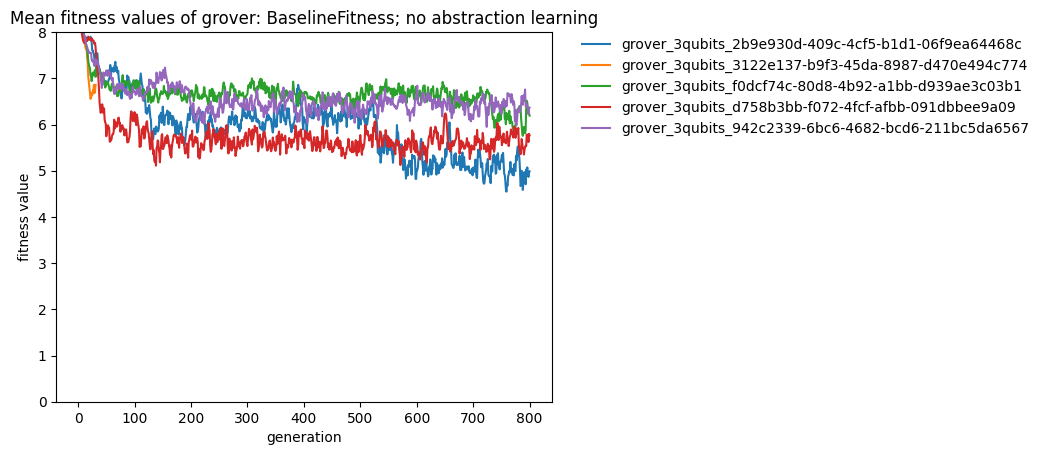

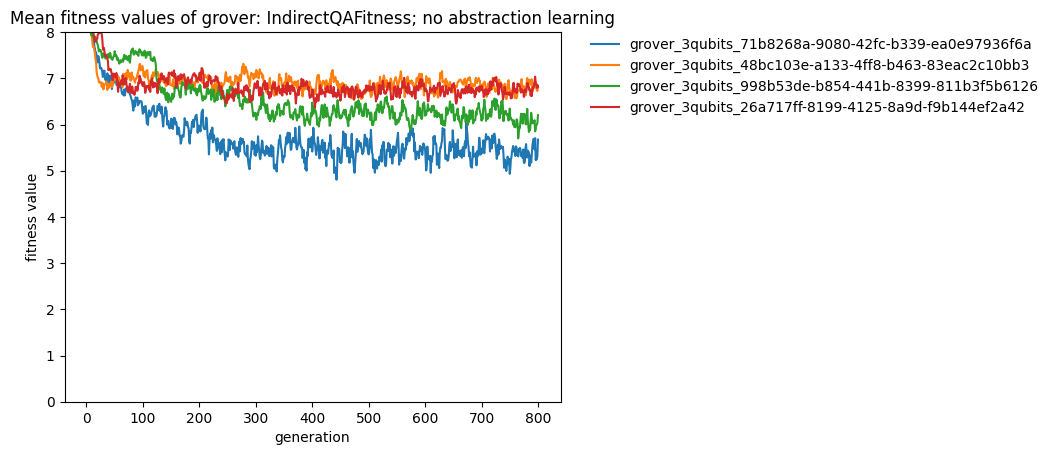

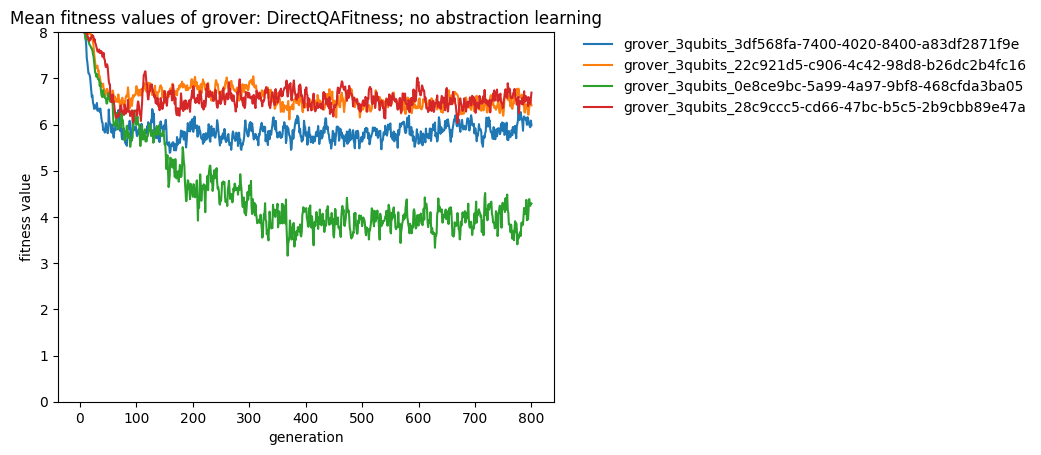

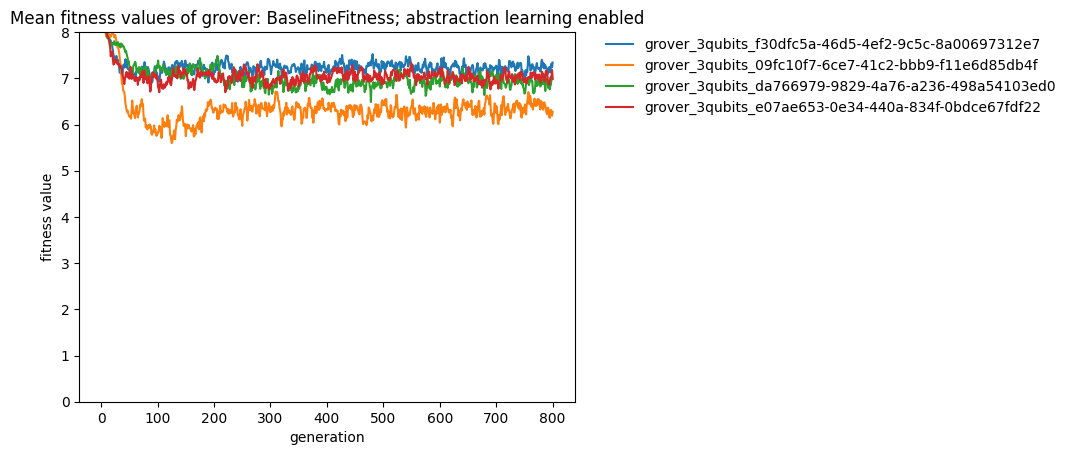

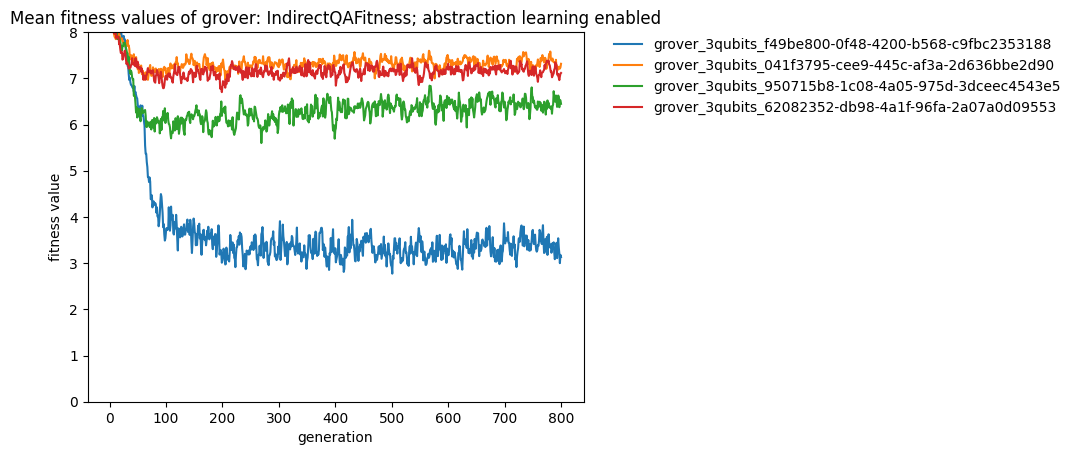

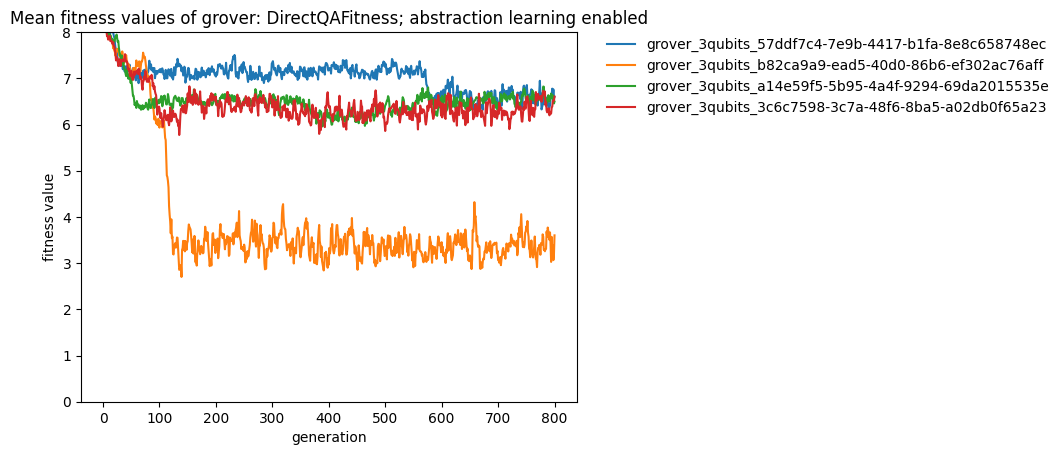

In [10]:
# Group by configuration
configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    legend = []

    for experiment_id in experiment_ids:
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        legend.append(experiment_id)
        
        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
        
        ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])
        ax.set_xlabel("generation")
        ax.set_ylabel("fitness value")
        ax.set_ylim([0, 8])
        ax = plt.subplot()
    
    plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, framealpha=0)
    plt.title(f"Mean fitness values of {EVALUATION_CASE}: {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_mean.png", bbox_inches='tight', transparent=True)
    plt.show()


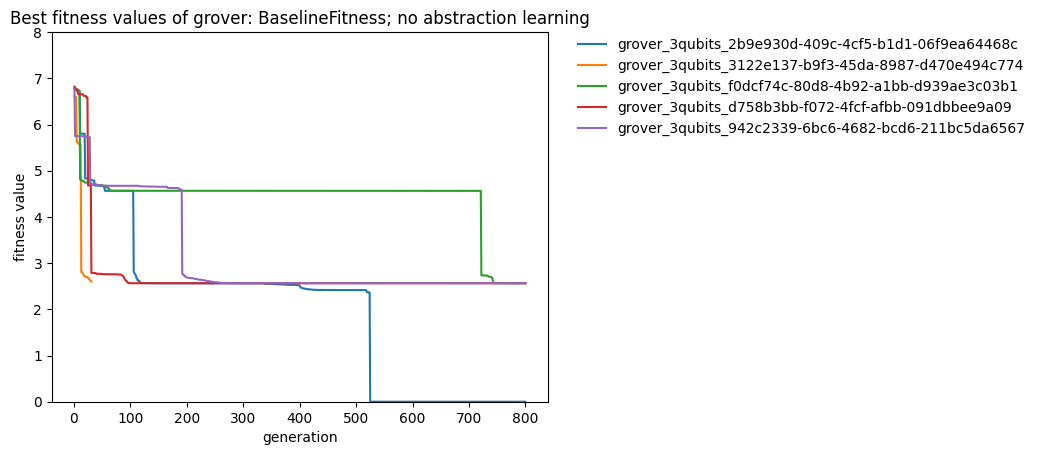

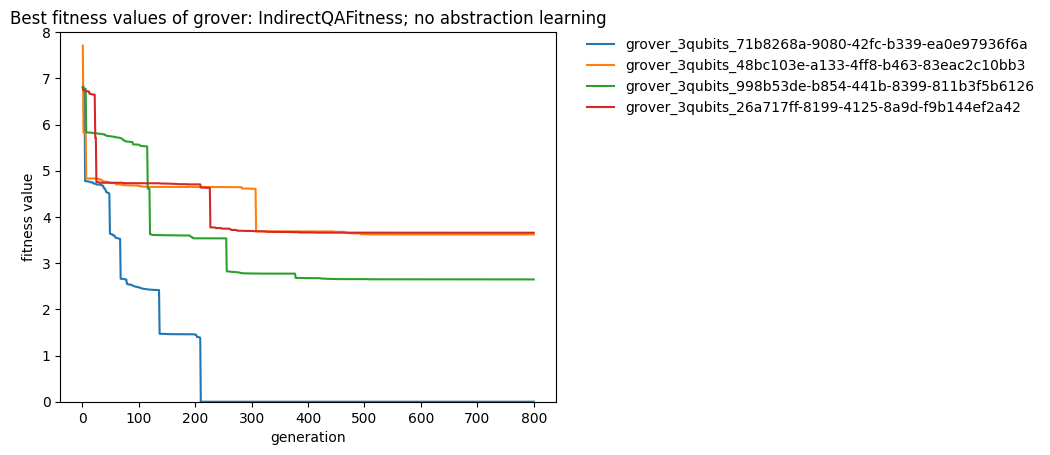

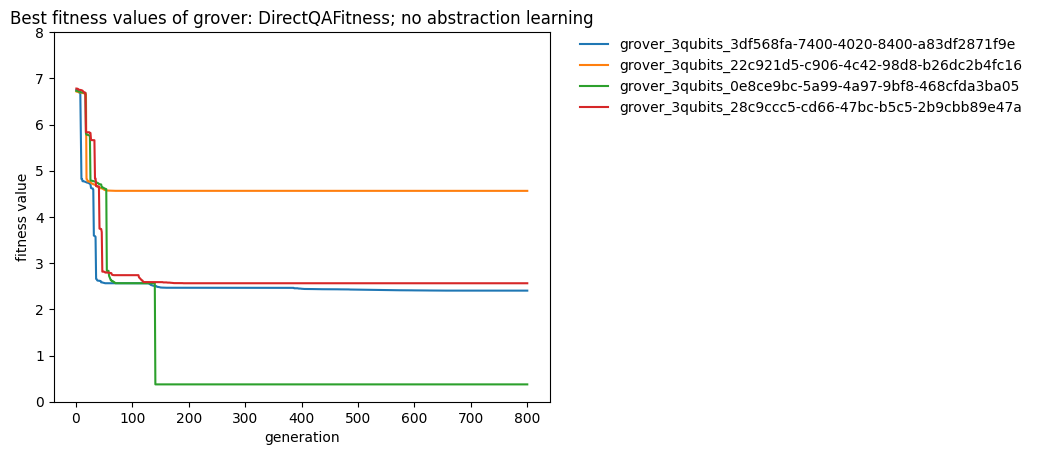

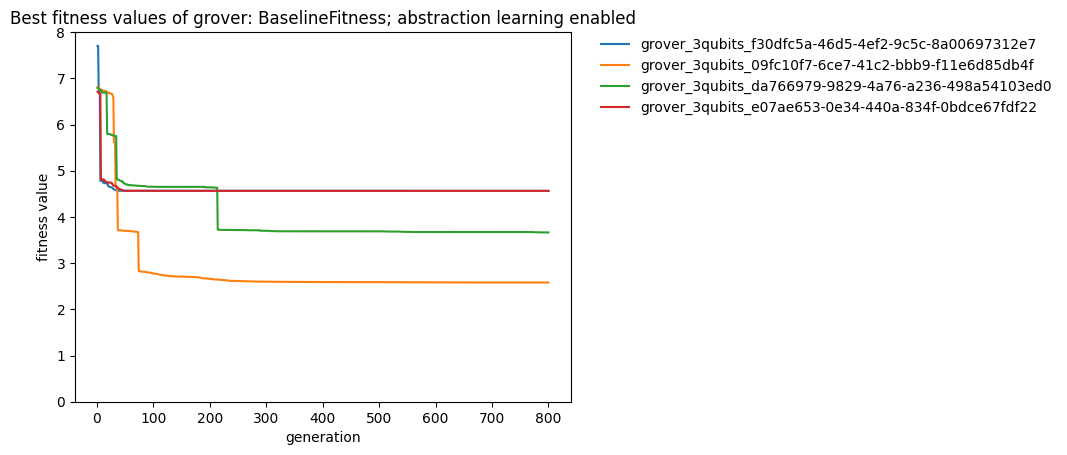

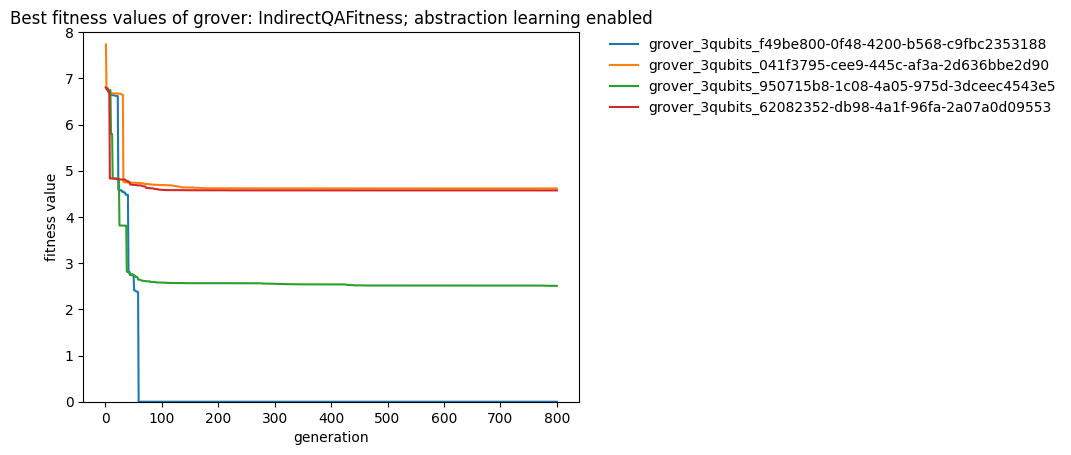

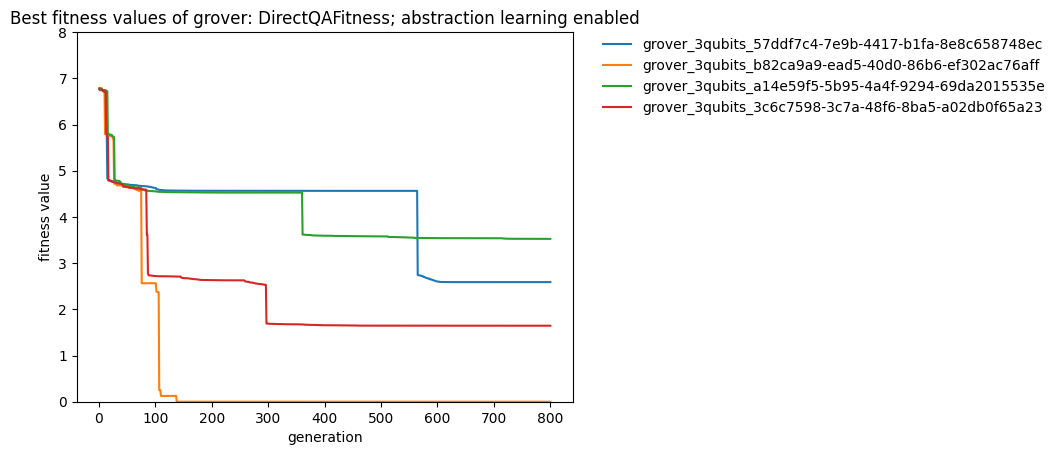

In [11]:
# Group by configuration
configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    legend = []

    for experiment_id in experiment_ids:        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        legend.append(experiment_id)
        
        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
        
        ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])
        ax.set_xlabel("generation")
        ax.set_ylabel("fitness value")
        ax.set_ylim([0, 8])
        ax = plt.subplot()
    
    plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, framealpha=0)
    plt.title(f"Best fitness values of {EVALUATION_CASE}: {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_best.png", bbox_inches='tight', transparent=True)
    plt.show()


## Print the best gate sequence of each experiment

In [12]:
for i, experiment in experiments.iterrows():
    print(f"\nExperiment Id: {experiment['experiment_id']}")
    print(f"\tDescription: {experiment['description']}")
    print(f"\tFitness Function: {experiment['fitness']}")
    print(f"\tLast commit id: {experiment['last_commit_id']}")

    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment["experiment_id"]]
    last_fitness_row = current_fitness_values[current_fitness_values["generation"] == current_fitness_values["generation"].max()]
    
    print(f"\tBest fitness value: {last_fitness_row['best_fitness_value'].tolist()[0]}")
    print(f"\tBest chromosome: {last_fitness_row['best_chromosome'].tolist()[0]}")



Experiment Id: grover_3qubits_2b9e930d-409c-4cf5-b1d1-06f9ea64468c
	Description:  
	Fitness Function: BaselineFitness
	Last commit id:  016489a2b9c58ccf0eb818f6eafc9cf4fee2778a
	Best fitness value: 2.7380662945214462
	Best chromosome:  [cx(control=0,target=1), crx(theta=3.1415897441286376,control=2,target=1), rz(theta=-3.1057422463666335,target=1), rz(theta=-3.141592653589793,target=1), ry(theta=-2.254369266484492,target=0), oracle(target1=2,target2=0,target3=1), y_layer(), rz(theta=-0.3385159150708108,target=2), h(target=1), swap_layer(), rz(theta=2.5289152883063983,target=0), h_layer(), ry(theta=-1.9003983408928566,target=1), cx(control=2,target=1), ry(theta=-3.141592653589793,target=2), oracle(target1=2,target2=0,target3=1), cx(control=1,target=2), cry(theta=-1.5660205306448192,control=2,target=0), cy(control=0,target=1), cx(control=0,target=2), y(target=1), ccz(control1=2,control2=1,target=0), cx(control=1,target=2), x(target=0), ccz(control1=0,control2=1,target=2), h(target=1), c